# **Simulated Financial Data Explanation**

The **simulated financial data** in the provided snippet creates synthetic datasets that mimic financial returns and features to demonstrate concepts like Beta and regression analysis. Here's a breakdown:

---

### **1. Simulating Market Returns**
#### Python Code:
```python
market_returns = np.random.normal(0, 0.02, 500)
```

- **Purpose**: Creates the **independent variable** (market returns).
- **Explanation**:
  - `np.random.normal(0, 0.02, 500)` generates 500 random numbers from a **normal distribution**.
  - **Mean (0)**: The expected return is 0% over time (neutral market).
  - **Standard Deviation (0.02)**: Implies daily market volatility of 2%.
- **Result**: A series of market returns that fluctuate around 0 with a standard deviation of 2%.

---

### **2. Simulating Stock Returns**
#### Python Code:
```python
stock_returns = market_returns * 1.2 + np.random.normal(0, 0.01, 500)  # True beta = 1.2
```

- **Purpose**: Creates the **dependent variable** (stock returns) based on market returns and additional noise.
- **Explanation**:
  - `market_returns * 1.2`: Multiplies market returns by 1.2, making **Beta = 1.2**. This means the stock is more volatile than the market by 20%.
  - `np.random.normal(0, 0.01, 500)`: Adds random noise with a standard deviation of 1% to simulate idiosyncratic (stock-specific) factors.
- **Result**: Stock returns that are strongly correlated with market returns but with additional variability.

---

### **3. Simulating Volatility (Feature 1)**
#### Python Code:
```python
volatility = np.abs(np.random.normal(0.02, 0.005, 500))
```

- **Purpose**: Adds an additional feature representing the stock's daily volatility.
- **Explanation**:
  - `np.random.normal(0.02, 0.005, 500)` generates volatility values centered around 2% (0.02) with a standard deviation of 0.5% (0.005).
  - `np.abs(...)`: Ensures volatility is non-negative (volatility cannot be negative).
- **Result**: Mimics real-world volatility metrics, where daily fluctuations in stock prices are typically small but non-zero.

---

### **4. Simulating Volume (Feature 2)**
#### Python Code:
```python
volume = np.random.uniform(1, 10, 500)
```

- **Purpose**: Adds a second feature representing daily trading volume.
- **Explanation**:
  - `np.random.uniform(1, 10, 500)` generates 500 random numbers from a **uniform distribution** between 1 and 10.
  - Represents trading volume in arbitrary units (e.g., thousands or millions of shares).
- **Result**: Simulates daily trading activity, often an important feature in financial analysis.

---

### **Summary of Simulated Data**
- **Market Returns**: Independent variable, representing broad market movements.
- **Stock Returns**: Dependent variable, influenced by market returns (via Beta) and idiosyncratic noise.
- **Volatility**: Additional feature capturing daily fluctuations in stock prices.
- **Volume**: Another feature representing daily trading activity.

---

### **Purpose in Financial Modeling**
This simulation creates a dataset that mimics real-world financial data, allowing us to:
1. Test **regression models** (e.g., estimate Beta).
2. Explore relationships between stock returns and other features like volatility or volume.
3. Evaluate machine learning algorithms in a controlled environment before applying them to real data.


   market_returns  volatility    volume  stock_returns
0        0.009934    0.026997  3.428386       0.021183
1       -0.002765    0.024623  8.425445       0.015776
2        0.012954    0.020298  5.484301       0.001559
3        0.030461    0.016765  1.693525       0.042182
4       -0.004683    0.023491  1.526958      -0.012126


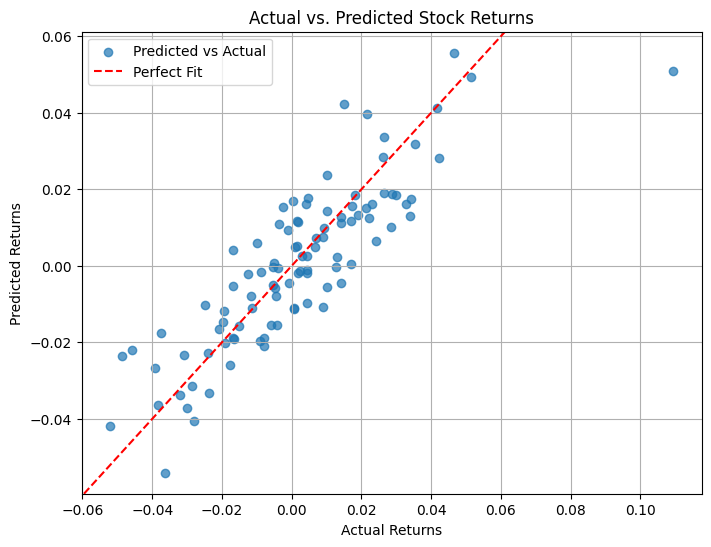

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Simulated financial data (see explanation above)
np.random.seed(42)
market_returns = np.random.normal(0, 0.02, 500)
stock_returns = market_returns * 1.2 + np.random.normal(0, 0.01, 500)  # True beta = 1.2
volatility = np.abs(np.random.normal(0.02, 0.005, 500))  # Feature 1
volume = np.random.uniform(1, 10, 500)  # Feature 2

# Create a DataFrame
data = pd.DataFrame({
    'market_returns': market_returns,
    'volatility': volatility,
    'volume': volume,
    'stock_returns': stock_returns
})

print(data.head())

# Train-test split
X = data[['market_returns', 'volatility', 'volume']]
y = data['stock_returns']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot actual vs. predicted returns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.title("Actual vs. Predicted Stock Returns")
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Fit")
plt.legend()
plt.grid(True)
plt.show()
